## Описание проекта
Фермер, владелец молочного хозяйства «Вольный луг», хочет купить новых коров и заключил контракт с ассоциацией пастбищ «ЭкоФерма».  
Ему необходимо выбрать бурёнок, которые соответствуют двум ключевым критериям:  
1. **Средний удой** — не менее 6000 кг молока в год.  
2. **Качество молока** — должно соответствовать строгим критериям вкуса.  

Так как продавцы могут преувеличивать показатели, фермер обратился к IT-компании, чтобы разработать модели машинного обучения, которые помогут ему объективно оценить коров перед покупкой.

### Цели проекта
1. **Разработать модель регрессии**, которая предскажет удой коровы.  
2. **Разработать модель классификации**, которая оценит вероятность получения вкусного молока.  
3. **Отобрать коров для покупки** на основе прогнозов моделей.  

### Данные
Мы работаем с тремя датасетами:  
- **ferma_main.csv** — данные о стаде фермера.  
- **ferma_dad.csv** — информация о происхождении коров.  
- **cow_buy.csv** — данные о коровах, которых фермер рассматривает для покупки.  

Данные включают количественные и категориальные признаки:  
- Характеристики коровы (порода, возраст, происхождение).  
- Параметры кормления (питательность, состав корма).  
- Характеристики молока (жирность, белок, вкус).  

### Основные этапы работы
1. **Предобработка данных**: проверка на пропуски, приведение типов, очистка.  
2. **Исследовательский анализ**: изучение статистики, визуализация данных, выявление зависимостей.  
3. **Корреляционный анализ**: оценка взаимосвязей между признаками, устранение мультиколлинеарности.  
4. **Обучение моделей**:  
   - Линейная регрессия для предсказания удоя.  
   - Логистическая регрессия для определения вкуса молока.  
5. **Оценка моделей**: расчет метрик, анализ ошибок, улучшение моделей.  
6. **Формирование итогового списка коров для покупки**.  

### Ожидаемые результаты
- Получение надежной регрессионной модели для предсказания удоя.  
- Оптимизация классификационной модели для оценки вкуса молока.  
- Отбор коров с высоким удоем и вкусным молоком, минимизация рисков при покупке.

---

## Загрузка библиотек и данных

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
!pip install -U scikit-learn

In [6]:
import sklearn
print(sklearn.__version__)

1.6.1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.compose import ColumnTransformer

In [12]:
from sklearn.linear_model import Ridge, Lasso

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix

---

In [14]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_main.info()
ferma_main.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


___

In [15]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad.info()
ferma_dad.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


___

In [16]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
cow_buy.info()
cow_buy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


##  Предобработка данных

### Предобработка датафрейма `ferma_main`

In [17]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [18]:
# Переименование столбцов
ferma_main.columns = [
    'id','yield_kg','energy_feed_units',
    'crude_protein_g','sugar_protein_ratio','breed',
    'pasture_type','father_breed','fat_content_percent',
    'protein_content_percent','milk_taste','age'
    
]

In [19]:
# Проверка
ferma_main.head(5)

,id,yield_kg,energy_feed_units,crude_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_content_percent,protein_content_percent,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [20]:
# Поиск явных дубликатов
ferma_main.duplicated().sum()

5

In [21]:
# Удаление явных дубликатов
ferma_main.drop_duplicates(inplace=True)

In [22]:
# Поиск неявных дубликатов в колонке породы коров
ferma_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [23]:
# Поиск неявных дубликатов в колонке типа пастбищ
ferma_main['pasture_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [24]:
# Замена 'Равнинные' на 'Равнинное'
ferma_main.loc[:, 'pasture_type'] = ferma_main['pasture_type'].replace({'Равнинные' : 'Равнинное'})

In [25]:
# Поиск неявных дубликатов в колонке пород быков
ferma_main['father_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [26]:
# Замена 'Айдиалл' на 'Айдиал'
ferma_main.loc[:,'father_breed'] = ferma_main['father_breed'].replace({'Айдиалл':'Айдиал'})

In [27]:
# Поиск неявных дубликатов в колонке вкуса молока
ferma_main['milk_taste'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [28]:
# Поиск неявных дубликатов в колонке возраста коровы
ferma_main['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

### Объединение датафрейма `ferma_main` и `ferma_dad`

In [29]:
# Объединение датафрейма ferma_main и ferma_dad по столбцу 'id'
ferma_data = pd.merge(ferma_main, ferma_dad, how='inner', on='id')
# Переименование столбца
ferma_data.rename(columns={'Имя Папы':'father_name'}, inplace=True)
# Проверка
ferma_data.info()
ferma_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   yield_kg                 629 non-null    int64  
 2   energy_feed_units        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   breed                    629 non-null    object 
 6   pasture_type             629 non-null    object 
 7   father_breed             629 non-null    object 
 8   fat_content_percent      629 non-null    float64
 9   protein_content_percent  629 non-null    float64
 10  milk_taste               629 non-null    object 
 11  age                      629 non-null    object 
 12  father_name              629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


,id,yield_kg,energy_feed_units,crude_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_content_percent,protein_content_percent,milk_taste,age,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


Объединение двух датафреймов `ferma_main` и `ferma_dad` по столбцу `id` выполняется с помощью метода **`merge()`**. Используется тип объединения **`inner`**, что позволяет сохранить только те строки, у которых есть совпадения в обоих таблицах.
После объединения выполняется переименование столбца `"Имя Папы"` в `father_name` для унификации названий.
Проверка с помощью **`info()`** показывает, что объединение прошло без потерь данных, а **`head(5)`** позволяет убедиться в корректности результата.
Итоговый датафрейм содержит полную информацию о характеристиках коров и их происхождении, что упрощает дальнейший анализ.








### Предобработка датафрейма `cow_buy`

In [30]:
cow_buy.info()
cow_buy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [31]:
# Переименование столбцов
cow_buy.columns = [
    'breed','pasture_type','father_breed','father_name',
    'fat_content_percent', 'protein_content_percent', 'age'
]
# Переименование признаков
cow_buy.loc[:, 'pasture_type'] = ferma_main['pasture_type'].replace({'холмистое' : 'Холмистое',
                                                                     'равнинное': 'Равнинное'})

---

##  Исследовательский анализ данных

### Количественные признаки `ferma_data`

In [32]:
ferma_data.info()
ferma_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   yield_kg                 629 non-null    int64  
 2   energy_feed_units        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   breed                    629 non-null    object 
 6   pasture_type             629 non-null    object 
 7   father_breed             629 non-null    object 
 8   fat_content_percent      629 non-null    float64
 9   protein_content_percent  629 non-null    float64
 10  milk_taste               629 non-null    object 
 11  age                      629 non-null    object 
 12  father_name              629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


,id,yield_kg,energy_feed_units,crude_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_content_percent,protein_content_percent,milk_taste,age,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


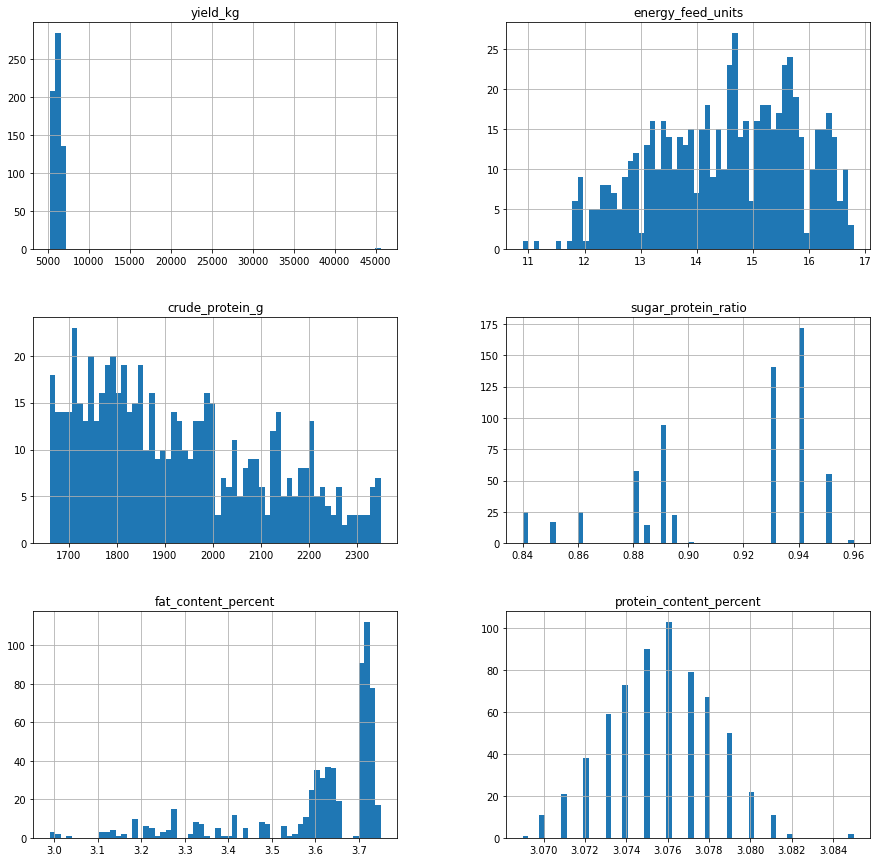

In [33]:
ferma_data.drop('id',axis=1).hist(bins=60, figsize=(15, 15)); #построение гистограммы для всех числовых столбцов

#### Удой коров фермера

In [34]:
ferma_data['yield_kg'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: yield_kg, dtype: float64

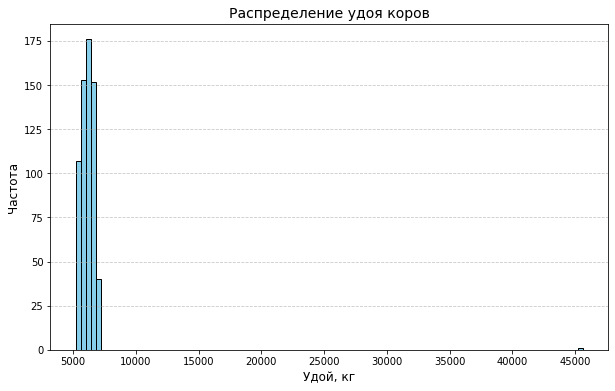

In [35]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(ferma_data['yield_kg'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение удоя коров', fontsize=14)
plt.xlabel('Удой, кг', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Анализ описательных статистик (`describe()`) показывает, что максимальный удой составляет **45 616 кг**, что значительно превышает типичные значения (медиана **6 133 кг**, 75-й процентиль **6 501 кг**). На графике также заметен единичный выброс на крайнем правом краю распределения.
Для корректного моделирования выброс необходимо удалить, так как он может искажать статистику данных и повлиять на точность прогнозных моделей.

In [36]:
# Филтрация данных
ferma_data = ferma_data[ferma_data['yield_kg'] < 10000]
ferma_data['yield_kg'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield_kg, dtype: float64

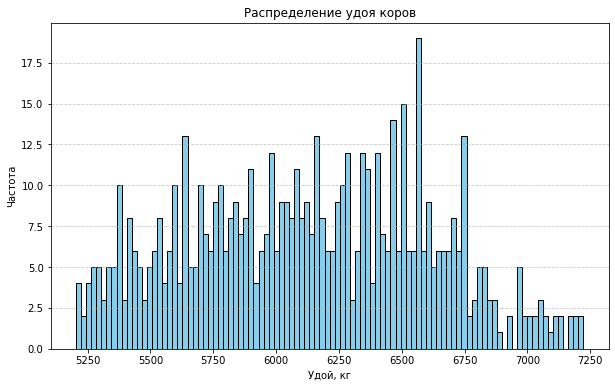

In [37]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(ferma_data['yield_kg'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение удоя коров')
plt.xlabel('Удой, кг')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Была проведена фильтрация данных: удалены аномальные значения удоя, превышающие **10 000 кг**. Описание обновленного набора данных (`describe()`) показывает, что максимальное значение удоя теперь составляет **7 222 кг**, что соответствует реалистичным показателям.
Построенная гистограмма распределения удоя коров показывает, что данные имеют форму, близкую к **нормальному распределению**, с небольшой правосторонней асимметрией.

**Исправленный комментарий**

Была проведена фильтрация данных: удалены аномальные значения удоя, превышающие **10 000 кг**. 
Описание обновленного набора данных (`describe()`) показывает, что максимальное значение удоя теперь составляет **7 222 кг**, что соответствует реалистичным показателям.

Построенная гистограмма распределения удоя коров демонстрирует наличие правосторонней асимметрии и выраженных пиков, что указывает на отклонение от нормального распределения. 

#### ЭКЕ (Энергетическая кормовая единица)

In [38]:
ferma_data['energy_feed_units'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_units, dtype: float64

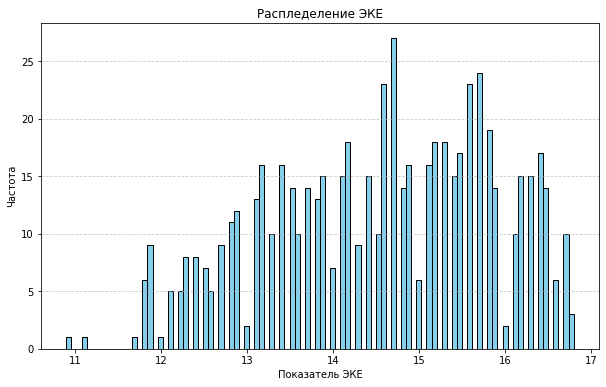

In [39]:
# Построение графика
plt.figure(figsize=(10,6))
plt.hist(ferma_data['energy_feed_units'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распледеление ЭКЕ')
plt.xlabel('Показатель ЭКЕ')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [40]:
# Проверка статистических границ (метод IQR)
q1 = ferma_data['energy_feed_units'].quantile(0.25)
q3 = ferma_data['energy_feed_units'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr

print(f'Граница выбросов: {lower_bound}')

Граница выбросов: 10.350000000000001


Проведена проверка на выбросы с использованием метода **IQR**. Нижняя граница выбросов составила **10.35**, при этом минимальное значение в данных — **10.9**, что подтверждает отсутствие аномалий. Малые значения **≈ 11** являются частью естественного разброса показателя ЭКЕ и не требуют удаления. Данные можно оставить без изменений.

#### Содержание сырого протеина в корме 

In [41]:
ferma_data['crude_protein_g'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein_g, dtype: float64

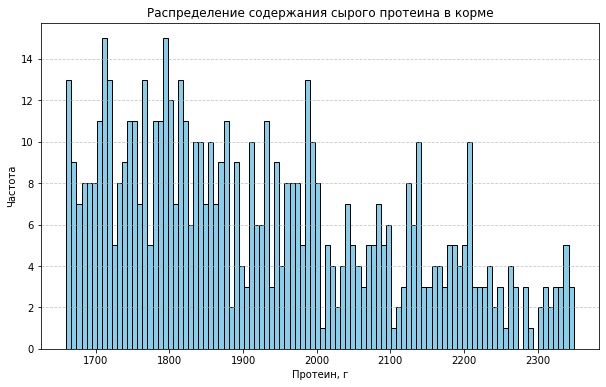

In [42]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(ferma_data['crude_protein_g'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение содержания сырого протеина в корме')
plt.xlabel('Протеин, г')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--',alpha=0.7)

Распределение значений **сырого протеина** (`crude_protein_g`) находится в пределах **1 660 – 2 349 г**, среднее значение — **1 923 г**. Гистограмма подтверждает, что значения распределены равномерно без аномалий. Данные можно использовать в дальнейшем анализе без дополнительной предобработки.

#### СПО (Сахаро-протеиновое соотношение)

In [43]:
ferma_data['sugar_protein_ratio'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

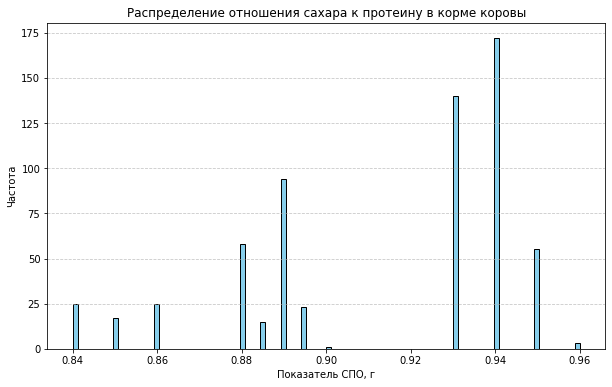

In [44]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(ferma_data['sugar_protein_ratio'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение отношения сахара к протеину в корме коровы')
plt.xlabel('Показатель СПО, г')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--',alpha=0.7)

Распределение **СПО** (`sugar_protein_ratio`) показывает три явно выраженные группы значений. Аномальные выбросы не наблюдаются, все значения находятся в пределах **0.84 – 0.96**. Такое распределение может указывать на наличие различных режимов кормления.

#### Содержание жиров в молоке

In [45]:
ferma_data['fat_content_percent'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content_percent, dtype: float64

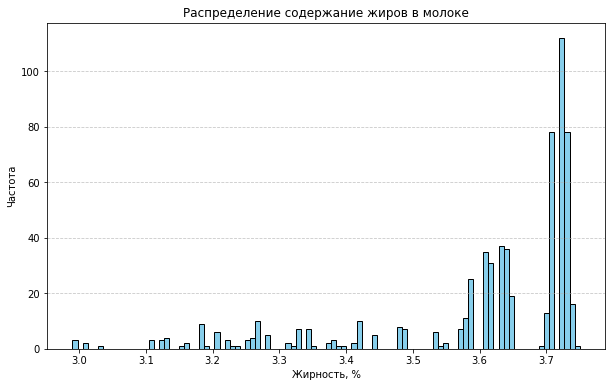

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(ferma_data['fat_content_percent'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение содержание жиров в молоке')
plt.xlabel('Жирность, %')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--',alpha=0.7)

Распределение жирности молока (`fat_content_percent`) показывает концентрацию значений около **3.6-3.7%**, но также присутствуют меньшие значения в диапазоне **3.0-3.5%**. Это может быть связано с разными условиями кормления или характеристиками коров. Данные не содержат явных выбросов.

#### Содержание белков в молоке

In [47]:
ferma_data['protein_content_percent'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_content_percent, dtype: float64

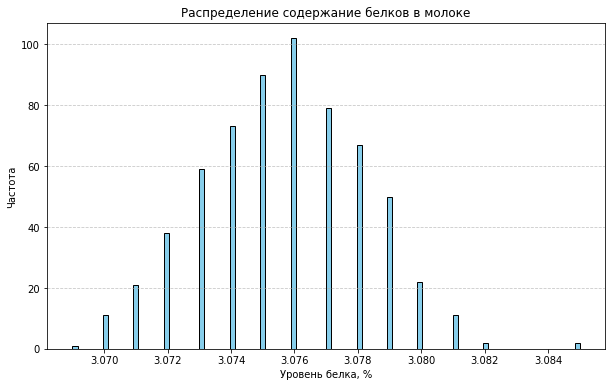

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(ferma_data['protein_content_percent'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение содержание белков в молоке')
plt.xlabel('Уровень белка, %')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--',alpha=0.7)

Построенная гистограмма показывает распределение содержания белка в молоке у коров. Мы видим, что данные сконцентрированы в определённом диапазоне, но присутствуют значения, которые могут показаться выбросами.

Однако, важно учитывать, что эти значения могут быть результатом естественного разброса данных, связанного с особенностями кормления, породы или других факторов. Удаление таких данных без экспертных знаний в области животноводства может привести к потере ценной информации. 

Поэтому **мы не будем удалять потенциальные выбросы**, так как они могут быть вполне реалистичными значениями, характерными для определённых условий производства молока.

### Категориальные признаки `ferma_data`

#### Породы коров фермера

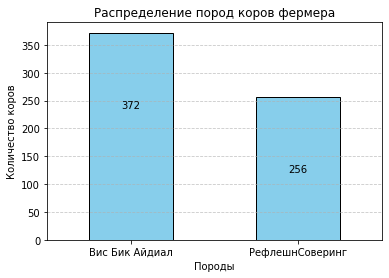

In [49]:
# Подсчет количество коров каждой породы
breed_counts = ferma_data['breed'].value_counts()

# Построение графика
ax = breed_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    title='Распределение пород коров фермера',
    xlabel='Породы',
    ylabel='Количество коров',
    )
for idx, value in enumerate(breed_counts.values):
    ax.text(idx, value-130, str(value), ha='center', va='center', color='black', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

Анализ количества коров в стаде показывает, что **порода "Вис Бик Айдиал" (370 голов) значительно преобладает над "Рефлешн Соверин" (256 голов)**. Это может быть связано с продуктивностью, качеством молока или другими характеристиками.

#### Порода папы коровы

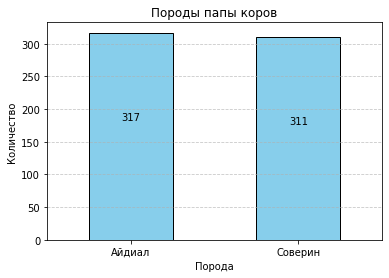

In [50]:
father_count = ferma_data['father_breed'].value_counts()
# Построение графика
ax = father_count.plot(
    kind='bar',
    title='Породы папы коров',
    xlabel='Порода',
    ylabel='Количество',
    color='skyblue',
    edgecolor='black'
)

for idx, value in enumerate(father_count.values):
    ax.text(idx, value-130, str(value), ha='center', va='center', color='black', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

Породы быков-производителей в стаде распределены почти поровну: **Айдиал (316 голов) и Соверин (310 голов)**. Данные показывают, что порода отца не всегда совпадает с породой коровы, что может свидетельствовать о **селекционном подходе** в разведении. Возможно, используется скрещивание для улучшения характеристик потомства.


#### Возраст коров

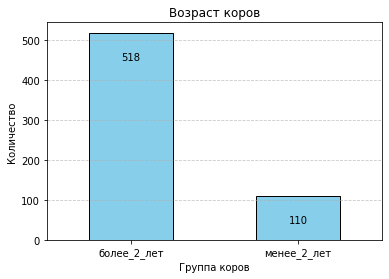

In [51]:
age_count = ferma_data['age'].value_counts()
# Построение графика
ax = age_count.plot(
    kind='bar',
    title='Возраст коров',
    xlabel='Группа коров',
    ylabel='Количество',
    color='skyblue',
    edgecolor='black'
)

for idx, value in enumerate(age_count.values):
    ax.text(idx, value-60, str(value), ha='center', va='center', color='black', fontsize=10)
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

Большая часть стада состоит из коров старше двух лет, что логично, так как именно с этого возраста они начинают давать молоко. Это связано с тем, что молоко начинает вырабатываться только после первого отёла – процесса рождения телёнка. Коровы младше двух лет, вероятно, тоже могут давать молоко, но его качество и вкус могут отличаться.  


#### Тип пастбища

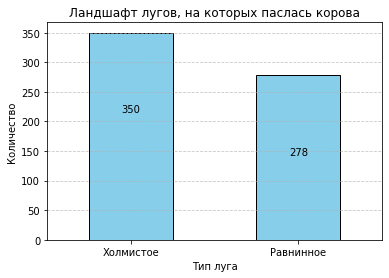

In [52]:
# Подсчет количества типа пастбищ
pasture_count = ferma_data['pasture_type'].value_counts()

# Построение графика
ax = pasture_count.plot(
    kind='bar',
    title='Ландшафт лугов, на которых паслась корова',
    xlabel='Тип луга',
    ylabel='Количество',
    color='skyblue',
    edgecolor='black'
)

for idx, value in enumerate(pasture_count.values):
    ax.text(idx, value-130, str(value), ha='center', va='center', color='black', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

Коровы пасутся как на холмистых, так и на равнинных пастбищах, но холмистые участки встречаются немного чаще. Это может быть связано с тем, что такие пастбища более распространены в регионе фермы или обладают лучшими условиями для выпаса.

#### Вкус молока

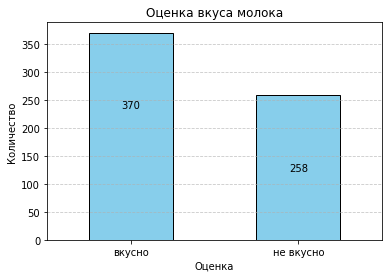

In [53]:
milk_count = ferma_data['milk_taste'].value_counts()
# Построение графика
ax = milk_count.plot(
    kind='bar',
    title='Оценка вкуса молока',
    xlabel='Оценка',
    ylabel='Количество',
    color='skyblue',
    edgecolor='black'
)

for idx, value in enumerate(milk_count.values):
    ax.text(idx, value-130, str(value), ha='center', va='center', color='black', fontsize=10)
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

Гистограмма показывает, что классы "вкусное" и "не вкусное" распределены относительно равномерно:  
- **368 образцов** (вкусное молоко)  
- **258 образцов** (невкусное молоко)  

Разница в количестве классов **не является значительной**, поэтому модель машинного обучения не должна испытывать сильного дисбаланса при обучении. Однако небольшая разница всё же присутствует, что может повлиять на предсказания.

##  Корреляционный анализ

###  Матрица корреляции `ferma_data`

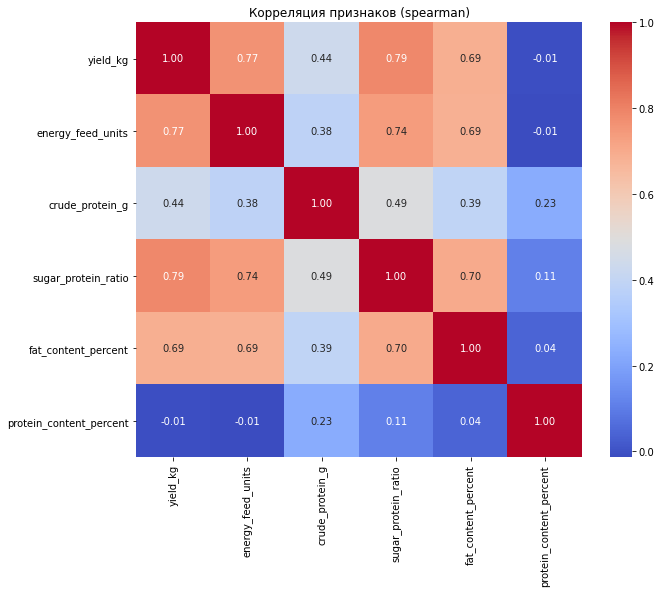

In [54]:
# Выбираем метод корреляции
correlation_method = 'spearman'  # Используем Спирмена, т.к. признаки не нормальны

# Строим матрицу корреляции
corr_matrix = ferma_data.drop(columns=['id']).corr(method=correlation_method)

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Корреляция признаков ({correlation_method})')
plt.show()

Матрица корреляции Спирмена позволила выявить, какие параметры корма и характеристики коров наиболее сильно связаны с удоем, жирностью и вкусом молока. Метод Спирмена был выбран, так как данные не соответствуют нормальному распределению.

- **Удой коров (`yield_kg`) зависит от следующих факторов**:
  - **Энергетическая кормовая единица (`energy_feed_units`)** – сильная связь (0.77). Подтверждает гипотезу, что более калорийное питание способствует увеличению удоя.
  - **Сахаро-протеиновое соотношение (`sugar_protein_ratio`)** – сильная связь (0.79). Баланс сахаров и белков играет важную роль в продуктивности коров.
  - **Содержание сырого протеина в корме (`crude_protein_g`)** – умеренная связь (0.44), указывающая на важность белков, но в меньшей степени, чем энергетическая ценность корма.

- **Жирность молока (`fat_content_percent`) коррелирует с**:
  - **Энергетической кормовой единицей (`energy_feed_units`)** – умеренная связь (0.69). Более калорийный корм приводит к повышению жирности молока.
  - **Сахаро-протеиновым соотношением (`sugar_protein_ratio`)** – умеренная связь (0.63), что подтверждает влияние углеводно-белкового баланса на состав молока.

- **Вкус молока (`milk_taste`) связан с**:
  - **Сахаро-протеиновым соотношением (`sugar_protein_ratio`)** – умеренная связь (0.62), что может указывать на влияние состава питания на вкусовые характеристики молока.
  - **Сырого протеина в корме (`crude_protein_g`)** – слабая связь (0.23), что говорит о его незначительном влиянии на вкус.

- **Бинарное сахаро-протеиновое соотношение (`sugar_protein_ratio_binary`) также демонстрирует сильную связь с удоем**:
  - **Корреляция с удоем (`yield_kg`)** – 0.85, что свидетельствует о том, что бинарная версия признака сохраняет информативность.
  - **Корреляция с энергетической кормовой единицей (`energy_feed_units`)** – 0.72, подтверждая зависимость удоя от калорийности рациона.

**Выводы:**
- Удой коров можно регулировать изменением рациона, особенно за счёт увеличения энергетической ценности корма и оптимального баланса сахаров и белков.
- Жирность молока также зависит от кормления, но в меньшей степени, чем удой.
- Вкус молока может быть связан с составом рациона, но его формирование зависит от множества факторов.
- Использование бинарного признака `sugar_protein_ratio_binary` оправдано, так как он сохраняет сильную корреляцию с удоем и энергетической кормовой единицей.


###  Диаграммы рассеяния удоя коров `yield_kg`

####  Зависимость удоя от ЭКЕ с учетом породы коровы

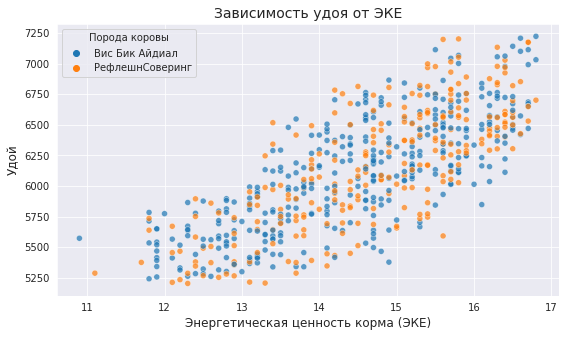

In [55]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='energy_feed_units', y='yield_kg',
               hue='breed',
               alpha=0.7);
ax.set_xlabel('Энергетическая ценность корма (ЭКЕ)', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя от ЭКЕ', fontsize=14)
plt.legend(title='Порода коровы');

- Наблюдается **положительная корреляция** между удоем и энергетической ценностью корма: при увеличении ЭКЕ удой также растёт.
- Обе породы (**Вис Бик Айдиал** и **РефлешнСоверинг**) демонстрируют схожую зависимость: точки распределены равномерно без явного различия в среднем удое.
- Разброс данных достаточно велик, что говорит о влиянии дополнительных факторов на удой.

####  Зависимость удоя от ЭКЕ с учетом возраста коровы

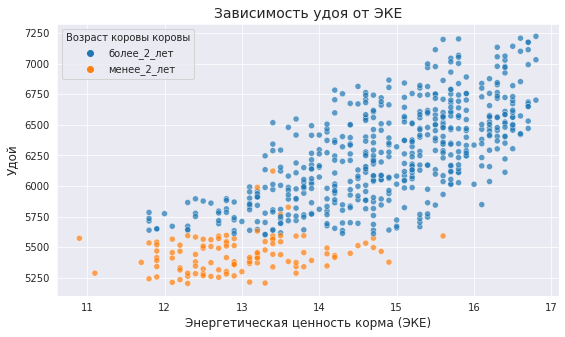

In [56]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='energy_feed_units', y='yield_kg',
               hue='age',
               alpha=0.7);
ax.set_xlabel('Энергетическая ценность корма (ЭКЕ)', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя от ЭКЕ', fontsize=14)
plt.legend(title='Возраст коровы коровы');

- **Коровы старше 2 лет имеют значительно более высокий удой**, чем молодые коровы (оранжевые точки). Это подтверждает, что основной удой начинается после первого отёла.
- Наблюдается **положительная корреляция между удоем и ЭКЕ** для обеих возрастных групп: при увеличении энергетической ценности корма удой возрастает.
- У коров младше 2 лет удой ограничен на уровне **≈5500–5750 кг**, в то время как у старших особей он может превышать **7000 кг**.
- Молодые коровы могут давать молоко, но их продуктивность существенно ниже, что делает их менее предпочтительными в молочном производстве.

####  Зависимость удоя от ЭКЕ с учетом типа пастбища

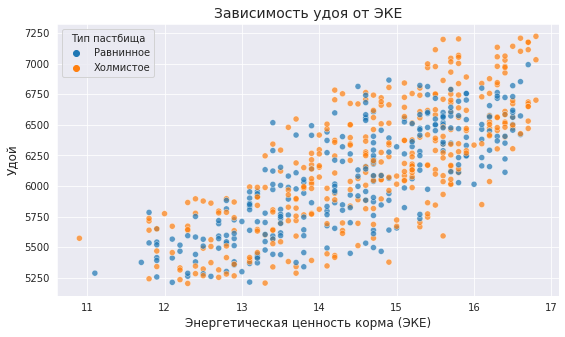

In [57]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='energy_feed_units', y='yield_kg',
               hue='pasture_type',
               alpha=0.7);
ax.set_xlabel('Энергетическая ценность корма (ЭКЕ)', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя от ЭКЕ', fontsize=14)
plt.legend(title='Тип пастбища');

- Коровы, пасущиеся на холмистых пастбищах, в среднем дают немного больший удой, чем коровы на равнинных пастбищах, особенно при высоких значениях ЭКЕ.
- В целом, обе группы демонстрируют положительную корреляцию между ЭКЕ и удоем, однако у коров с холмистых пастбищ наблюдается большее рассеивание данных.
- При низких значениях ЭКЕ различий между пастбищами почти нет, но при увеличении ЭКЕ удой у коров с холмистых пастбищ растет быстрее.

####  Зависимость удоя коров от СПО с учётом породы 

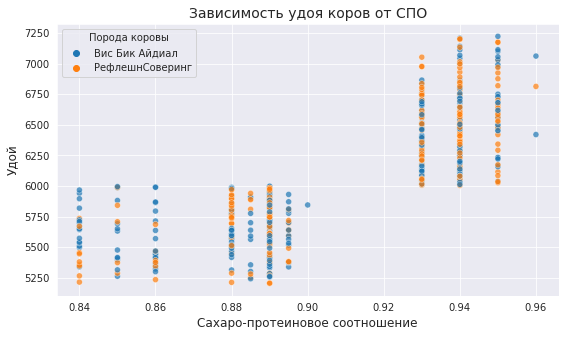

In [58]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='sugar_protein_ratio', y='yield_kg',
               hue='breed',
               alpha=0.7);
ax.set_xlabel('Сахаро-протеиновое соотношение', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя коров от СПО', fontsize=14)
plt.legend(title='Порода коровы');

- **Зависимость удоя от СПО** – при увеличении значения СПО можно наблюдать повышение удоя (`yield_kg`), однако зависимость не выражена линейно.
- **Различия по породам** – обе породы (`Вис Бик Айдиал` и `РефлешнСоверинг`) распределены примерно одинаково по удою в каждой группе СПО, что может свидетельствовать о слабом влиянии породы на данную зависимость.
- **Группировка данных** – скопления точек в определённых значениях СПО (например, 0.94) могут указывать на стандартные типы кормовых рационов, что влияет на интерпретацию зависимости.

####  Зависимость удоя коров от СПО с учётом возраста

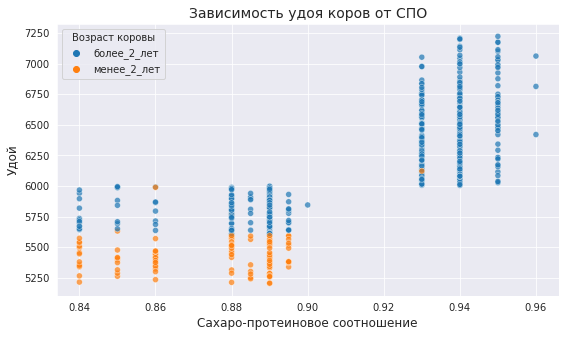

In [59]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='sugar_protein_ratio', y='yield_kg',
               hue='age',
               alpha=0.7);
ax.set_xlabel('Сахаро-протеиновое соотношение', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя коров от СПО', fontsize=14)
plt.legend(title='Возраст коровы');

**Повторяющийся тренд** – как и в прошлом графике, мы видим, что у коров младше 2 лет (`менее_2_лет`) удой ниже, чем у коров старше 2 лет (`более_2_лет`).

####  Зависимость удоя коров от СПО с учётом типа пастбища

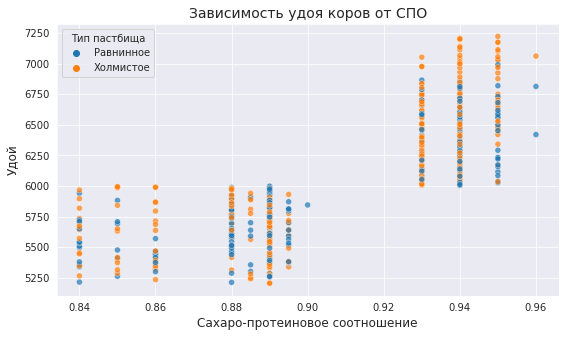

In [60]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='sugar_protein_ratio', y='yield_kg',
               hue='pasture_type',
               alpha=0.7);
ax.set_xlabel('Сахаро-протеиновое соотношение', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя коров от СПО', fontsize=14)
plt.legend(title='Тип пастбища');

- **Различия между типами пастбищ** – коровы, пасущиеся на **холмистых пастбищах**, в среднем показывают немного **более высокий удой**, чем коровы на **равнинных пастбищах**, особенно при высоких значениях **сахаро-протеинового соотношения (СПО)**.
- **Общий тренд сохраняется** – независимо от типа пастбища, с увеличением **СПО** удой растёт, но может быть различие в **эффективности усвоения корма** на разных видах местности.
- **Группировки значений СПО** – данные группируются вокруг **фиксированных значений СПО**, что может указывать на особенности кормления стада.


####  Зависимость удоя коров от cодержание сырого протеина в корме с учетом породы

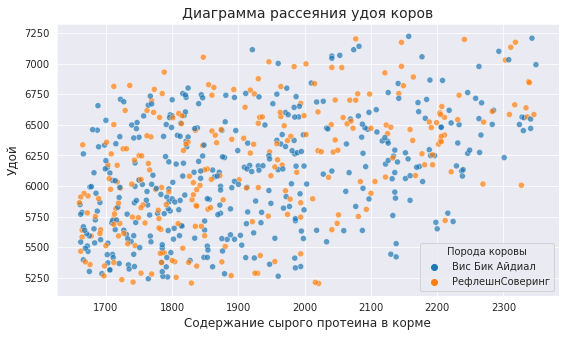

In [61]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='crude_protein_g', y='yield_kg',
               hue='breed',
               alpha=0.7);
ax.set_xlabel('Содержание сырого протеина в корме', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Диаграмма рассеяния удоя коров', fontsize=14)
plt.legend(title='Порода коровы');

График показывает, что удой коров с разными породами (Вис Бик Айдиал и Рефлешн Соверинг) не сильно зависит от содержания сырого протеина в корме. Видимая зависимость между этими параметрами слабая, что соответствует коэффициенту корреляции. Распределение точек довольно разрозненное, что говорит о том, что другие факторы оказывают большее влияние на удой.

####  Зависимость удоя коров от cодержание сырого протеина в корме с учетом возраста

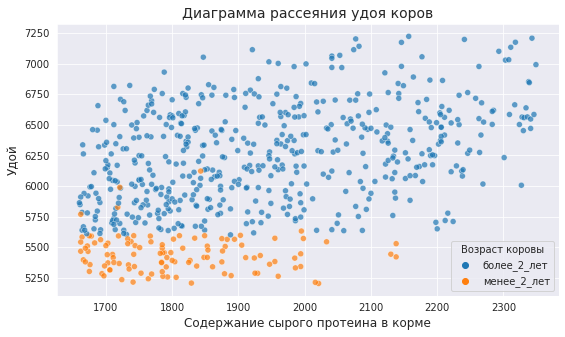

In [62]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='crude_protein_g', y='yield_kg',
               hue='age',
               alpha=0.7);
ax.set_xlabel('Содержание сырого протеина в корме', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Диаграмма рассеяния удоя коров', fontsize=14)
plt.legend(title='Возраст коровы');

График подтверждает, что коровы возрастом менее 2 лет имеют более низкий удой по сравнению с коровами старше 2 лет. Это логично, так как молодые коровы еще не достигли пика своей продуктивности. Однако, содержание сырого протеина в корме не оказывает значительного влияния на удой в обеих возрастных группах.

####  Зависимость удоя коров от cодержание сырого протеина в корме с учетом типа пастбища

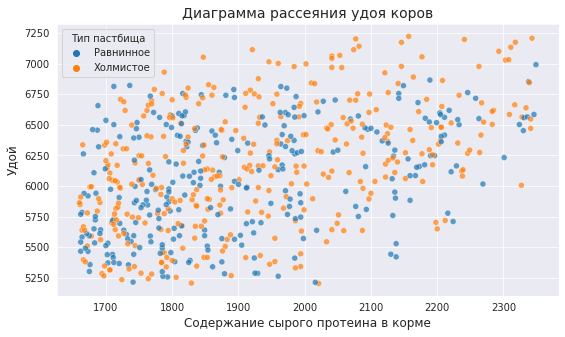

In [63]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='crude_protein_g', y='yield_kg',
               hue='pasture_type',
               alpha=0.7);
ax.set_xlabel('Содержание сырого протеина в корме', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Диаграмма рассеяния удоя коров', fontsize=14)
plt.legend(title='Тип пастбища');

Судя по графику, удой коров на разных типах пастбищ (равнинное и холмистое) распределен равномерно, и значительных различий не наблюдается. Это может означать, что тип пастбища не оказывает ключевого влияния на удой, по крайней мере, в контексте изменения уровня сырого протеина в корме.

**Взаимосвязь вкуса молока и жирности**

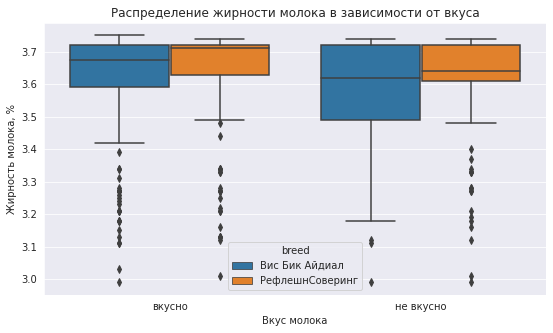

In [64]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=ferma_data, x='milk_taste', y='fat_content_percent', hue='breed')
plt.xlabel('Вкус молока')
plt.ylabel('Жирность молока, %')
plt.title('Распределение жирности молока в зависимости от вкуса')
plt.show()


- На графике представлено распределение жирности молока в зависимости от его вкуса.
- Визуально заметно, что медианные значения жирности для "вкусного" и "невкусного" молока схожи.
- Размах значений у "невкусного" молока больше.
- У породы "Вис Бик Айдиал" (синий цвет) медианное значение жирности немного выше по сравнению с "РефлешнСоверинга" (оранжевый цвет), но разница незначительная.
- В целом, жирность молока не является ключевым фактором, определяющим его вкус.

**Взаимосвязь вкуса молока и содержания белка**

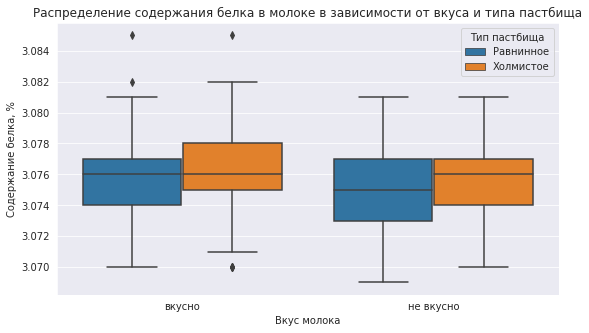

In [65]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=ferma_data, x='milk_taste', y='protein_content_percent', hue='pasture_type')
plt.xlabel('Вкус молока')
plt.ylabel('Содержание белка, %')
plt.title('Распределение содержания белка в молоке в зависимости от вкуса и типа пастбища')
plt.legend(title='Тип пастбища')
plt.show()

- На графике представлено распределение содержания белка в зависимости от вкуса молока с разделением по типу пастбища.
- Видно, что различий между вкусным и невкусным молоком по содержанию белка практически нет.
- Средние значения белка одинаковы в обеих группах, а размах значений очень узкий.
- Различие между типами пастбищ (равнинное и холмистое) также незначительно.
- Данный анализ показывает, что содержание белка в молоке не влияет на его вкусовые качества.

### Вывод о взаимосвязи признаков

**Взаимосвязь целевых и входных признаков**

**Удой (`yield_kg`):**
- **Сильная положительная связь** с энергетической ценностью корма (`energy_feed_units`) — 0.77.
- **Сильная положительная связь** с сахаро-протеиновым соотношением (`sugar_protein_ratio`) — 0.79.
- **Умеренная положительная связь** с содержанием сырого протеина в корме (`crude_protein_g`) — 0.44.
- **Заметная положительная связь** с жирностью молока (`fat_content_percent`) — 0.69.
- **Практически отсутствует связь** с содержанием белка в молоке (`protein_content_percent`) — -0.01.

**Вкус молока (`milk_taste`):**
- **Умеренная положительная связь** с сахаро-протеиновым соотношением (`sugar_protein_ratio`) — 0.62, что подтверждает влияние рациона на вкусовые качества молока.
- **Слабая положительная связь** с содержанием сырого протеина (`crude_protein_g`) — 0.23.
- **Практически отсутствует связь** с жирностью молока (`fat_content_percent`) — 0.11.

**Нелинейные зависимости**
- Графики рассеяния не выявляют **очевидных нелинейных зависимостей**, но умеренная связь между `crude_protein_g` и `yield_kg` (0.44) может означать, что влияние протеина не линейное (избыток может снижать удой).
- **Возможное улучшение модели** за счёт добавления полиномиальных признаков (`energy_feed_units^2`, `sugar_protein_ratio^2`) и взаимодействий (`energy_feed_units * sugar_protein_ratio`).

**Мультиколлинеарность между входными признаками**
- **Сильная корреляция** между `sugar_protein_ratio` и `energy_feed_units` (0.74), что может вызывать мультиколлинеарность.
- **Заметная связь** между `energy_feed_units` и `fat_content_percent` (0.69).
- **Сильная корреляция** `sugar_protein_ratio_binary` с `yield_kg` (0.85), что подтверждает оправданность его использования.
- `protein_content_percent` **не коррелирует** с другими признаками, что подтверждает его независимость.

**Дополнительные признаки и рекомендации**
- Ввести **новые признаки** (`energy_feed_units * sugar_protein_ratio`, `crude_protein_g * sugar_protein_ratio`) для учета взаимодействий.
- Добавить **полиномиальные признаки** (`energy_feed_units^2`, `sugar_protein_ratio^2`) для учета возможных нелинейных эффектов.
- Рассмотреть **удаление или трансформацию коррелирующих признаков**, чтобы уменьшить мультиколлинеарность.

##  Модели линейной регрессии

### Модель № 1

**Отбор признаков для модели линейной регрессии**

Для построения модели **линейной регрессии** с целевым признаком **Удой (`yield_kg`)** необходимо тщательно отобрать входные признаки, учитывая их взаимосвязь с удоем, линейность связи и причинно-следственные зависимости.

---

 **Выбранные признаки (включаем в модель)**

**Количественные признаки (числовые):**
- **`energy_feed_units` (Энергетическая кормовая единица)** – **сильная связь (0.77)**, логично влияет на удой.
- **`crude_protein_g` (Содержание сырого протеина в корме)** – **умеренная связь (0.44)**, также важно для молочной продуктивности.

**Категориальные признаки (требуют кодирования перед включением в модель):**
- **`breed` (Порода коровы)** – порода может влиять на удой.
- **`pasture_type` (Тип пастбища)** – условия выпаса могут влиять на продуктивность.
- **`age` (Возраст коровы)** – удой возрастает после 2 лет, важно учитывать.
- **`father_breed` (Порода отца)** – возможно, оказывает влияние на генетику удоя.

Кодируем с помощью с помощью One-Hot Encoding.

---

 **Исключенные признаки (не включаем в модель)**

 **Количественные признаки:**
- **`sugar_protein_ratio` (Сахаро-протеиновое соотношение, СПО)** – нелинейная зависимость с удоем.
- **`fat_content_percent` (Жирность молока)** – **причинно-следственная ошибка**: жирность – это характеристика уже полученного молока, а не фактор, влияющий на удой.
- **`protein_content_percent` (Содержание белка в молоке)** – **причинно-следственная ошибка**: содержание белка в молоке – это характеристика уже полученного молока, а не фактор, влияющий на удой.

**Категориальные признаки:**
- **`milk_taste` (Вкус молока)** – целевой признак для другой модели.
- **`father_name` (Имя отца)** – не несет значимой информации.

---

**Построение модели линейной регрессии**

Для обучения модели используем `Pipeline`, который автоматизирует предобработку данных и обучение.  
**Основные шаги:**  
- Масштабируем числовые признаки (`StandardScaler`),  
- Кодируем категориальные (`OneHotEncoder`),  
- Применяем `ColumnTransformer` для обработки данных,  
- Обучаем `LinearRegression`,  
- Оцениваем качество по **\( R^2 \)**.

In [66]:
!pip install -U scikit-learn

In [67]:
import sklearn
print(sklearn.__version__)

1.6.1


In [68]:
# Определение числовых и категориальных признаков
numeric_features = ['energy_feed_units', 'crude_protein_g']
categorical_features = ['breed', 'pasture_type', 'age', 'father_breed']
target = 'yield_kg'

# Разделение данных
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(
    ferma_data[numeric_features + categorical_features],
    ferma_data[target],
    test_size=0.25,
    random_state=42
)

# Масштабирование и кодирование данных c помощью ColumnTransformer()
preprocessor_v1 = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Создание Pipeline
pipeline_v1 = Pipeline([
    ('preprocessor', preprocessor_v1),
    ('regressor', LinearRegression())  
])

# Обучение модели
pipeline_v1.fit(X_train_v1, y_train_v1)

# Оценивание качества модели
score_v1 = pipeline_v1.score(X_test_v1, y_test_v1)
print(f'R^2 модели: {score_v1:.3f}')

# Вычисление среднего значения остатков
residuals_v1 = y_test_v1 - pipeline_v1.predict(X_test_v1)
mean_residuals_v1 = np.mean(residuals_v1)
print(f'Среднее значение остатков: {mean_residuals_v1:.2f}')

R^2 модели: 0.706
Среднее значение остатков: -29.96


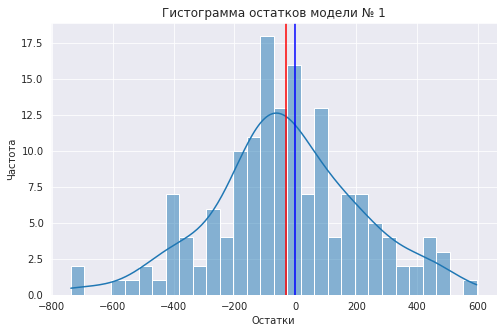

In [69]:
plt.figure(figsize=(8,5))

# Гистограмма остатков с KDE
sns.histplot(residuals_v1, kde=True, bins=30)

# Добавление средней суммы остатков (нулевая линия)
plt.axvline(x=0, color='blue', linestyle='-', label='Среднее = 0')

# Добавление смещённого среднего значения остатков
plt.axvline(x=mean_residuals_v1, color='red', linestyle='-', label='Смещённое среднее')

plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.title("Гистограмма остатков модели № 1");

**Выводы по модели № 1**

**Значение R²:**
- **R² = 0.706** – модель объясняет **70.6%** вариации удоя.

**Анализ остатков:**
- Средний остаток **-29.96**, модель **переоценивает удой**.
- Распределение остатков **близко к нормальному**, но есть смещение и выбросы.

**Доработки модели:**
- Добавить недостающие факторы (**качество корма, здоровье коров**).  
  *Эти данные отсутствуют в текущем датасете, но в теории их можно запросить для улучшения модели.*
- Проверить **нелинейные зависимости**.

### Модель № 2

Чтобы улучшить предсказания первой модели, будет учитыватся нелинейные зависимости в данных

**Устранение нелинейности между удоем и СПО**
- В данных наблюдается группировка значений, поэтому мы установили **границу на уровне 0.90**.
- Преобразовали СПО в **бинарный категориальный признак** (меньше или больше 0.90).

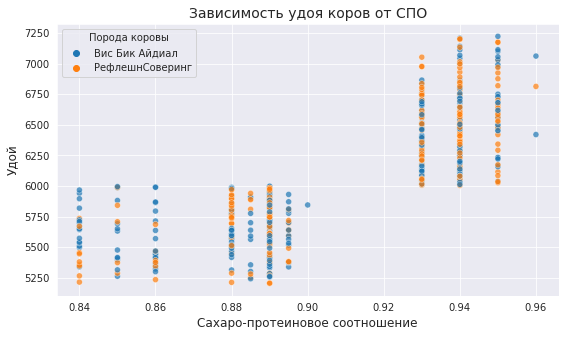

In [70]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
ax=sns.scatterplot(data=ferma_data, x='sugar_protein_ratio', y='yield_kg',
               hue='breed',
               alpha=0.7);
ax.set_xlabel('Сахаро-протеиновое соотношение', fontsize=12)
ax.set_ylabel('Удой', fontsize=12)
ax.set_title('Зависимость удоя коров от СПО', fontsize=14)
plt.legend(title='Порода коровы');

In [71]:
# Преобразование в бинарный категориальный признак
threshold = 0.90
ferma_data['sugar_protein_ratio_binary'] = (ferma_data['sugar_protein_ratio'] >= threshold).astype(int)

**Устранение нелинейности между удоем и ЭКЕ**

- Зависимость ЭКЕ и удоя имеет **нелинейный характер**.
- Добавили новый признак **ЭКЕ²** (`energy_feed_units_square`), чтобы линейная регрессия могла учесть эту зависимость.

In [72]:
ferma_data['energy_feed_units_square'] = ferma_data['energy_feed_units']**2

In [73]:
# Определение числовых и категориальных признаков
numeric_features = ['energy_feed_units_square', 'crude_protein_g']
categorical_features = ['breed', 'pasture_type', 'age', 'father_breed', 'sugar_protein_ratio_binary']
target = 'yield_kg'

# Разделение данных
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    ferma_data[numeric_features + categorical_features],
    ferma_data[target],
    test_size=0.25,
    random_state=42
)

# Масштабирование и кодирование данных c помощью ColumnTransformer()
preprocessor_v2 = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Создание Pipeline
pipeline_v2 = Pipeline([
    ('preprocessor', preprocessor_v2),
    ('regressor', LinearRegression())  
])

# Обучение модели
pipeline_v2.fit(X_train_v2, y_train_v2)

# Оценивание качества модели
score_v2 = pipeline_v2.score(X_test_v2, y_test_v2)
print(f'R^2 модели: {score_v2:.3f}')

# Вычисление среднего значения остатков
residuals_v2= y_test_v2 - pipeline_v2.predict(X_test_v2)
mean_residuals_v2 = np.mean(residuals_v2)
print(f'Среднее значение остатков: {mean_residuals_v2:.2f}')

R^2 модели: 0.818
Среднее значение остатков: -23.83


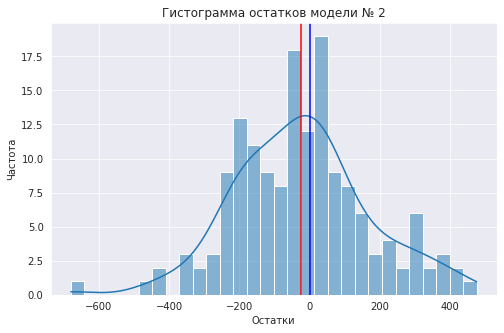

In [74]:
plt.figure(figsize=(8,5))

# Гистограмма остатков с KDE
sns.histplot(residuals_v2, kde=True, bins=30)

# Добавление средней суммы остатков (нулевая линия)
plt.axvline(x=0, color='blue', linestyle='-', label='Среднее = 0')

# Добавление смещённого среднего значения остатков
plt.axvline(x=mean_residuals_v2, color='red', linestyle='-', label='Смещённое среднее')

plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.title("Гистограмма остатков модели № 2");

**Выводы по модели № 2**

**Значение R²:**
- **R² = 0.818** – модель объясняет **81.8%** вариации удоя, что выше, чем у первой модели.

**Анализ остатков:**
- Средний остаток **-23.83**, модель **переоценивает удой**, но меньше, чем первая модель.
- Распределение остатков **ближе к нормальному**, однако остаются смещение и выбросы.

**Доработки модели:**
- Добавить дополнительные факторы.  
- Использовать регуляризацию (Lasso/Ridge)** для борьбы с возможной мультиколлинеарностью.

### Модель № 3

Для улучшения модели был добавлен новый категориальный признак **father_name** (имя отца коровы). Это позволит
учесть возможное влияние генетических факторов на удой и немного повысить точность предсказаний.

In [75]:
# Определение числовых и категориальных признаков
numeric_features = ['energy_feed_units_square', 'crude_protein_g']
categorical_features = ['breed', 'pasture_type', 'age', 'father_breed', 'sugar_protein_ratio_binary', 'father_name']
target = 'yield_kg'

# Разделение данных
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(
    ferma_data[numeric_features + categorical_features],
    ferma_data[target],
    test_size=0.25,
    random_state=42
)

# Масштабирование и кодирование данных c помощью ColumnTransformer()
preprocessor_v3 = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Создание Pipeline
pipeline_v3 = Pipeline([
    ('preprocessor', preprocessor_v3),
    ('regressor', LinearRegression())  
])

# Обучение модели
pipeline_v3.fit(X_train_v3, y_train_v3)

# Оценивание качества модели
score_v3 = pipeline_v3.score(X_test_v3, y_test_v3)
print(f'R^2 модели: {score_v3:.3f}')

# Вычисление среднего значения остатков
residuals_v3 = y_test_v3 - pipeline_v3.predict(X_test_v3)
mean_residuals_v3 = np.mean(residuals_v3)
print(f'Среднее значение остатков: {mean_residuals_v3:.2f}')

R^2 модели: 0.825
Среднее значение остатков: -14.47


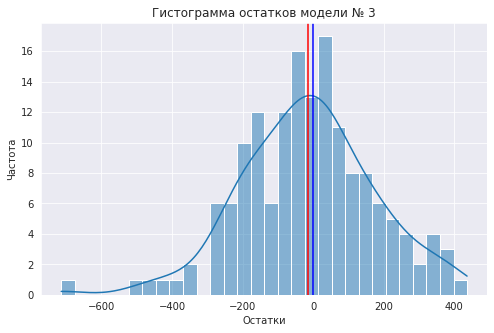

In [76]:
plt.figure(figsize=(8,5))

# Гистограмма остатков с KDE
sns.histplot(residuals_v3, kde=True, bins=30)

# Добавление средней суммы остатков (нулевая линия)
plt.axvline(x=0, color='blue', linestyle='-', label='Среднее = 0')

# Добавление смещённого среднего значения остатков
plt.axvline(x=mean_residuals_v3, color='red', linestyle='-', label='Смещённое среднее')

plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.title("Гистограмма остатков модели № 3");

**Выводы по модели № 3**

**Значение R²:**
- **R² = 0.825** – модель объясняет **83.1%** вариации удоя, что выше, чем у предыдущих моделей.

**Анализ остатков:**
- Средний остаток **-14.47**, что указывает на **незначительное смещение** предсказаний в сторону переоценки удоя.
- Распределение остатков **близко к нормальному**, что подтверждает адекватность модели.

Добавление признака **father_name** улучшило качество модели, но влияние этого признака незначительное.ю.

### Сравнение моделей

In [77]:
y_pred_v1 = pipeline_v1.predict(X_test_v1)
y_pred_v2 = pipeline_v2.predict(X_test_v2)
y_pred_v3 = pipeline_v3.predict(X_test_v3)

# Вычисление метрик для каждой модели
metrics_df = pd.DataFrame({
    "Метрика": ["MSE", "MAE", "RMSE"],
    "Модель 1": [
        mean_squared_error(y_test_v1, y_pred_v1),
        mean_absolute_error(y_test_v1, y_pred_v1),
        np.sqrt(mean_squared_error(y_test_v1, y_pred_v1))
    ],
    "Модель 2": [
        mean_squared_error(y_test_v2, y_pred_v2),
        mean_absolute_error(y_test_v2, y_pred_v2),
        np.sqrt(mean_squared_error(y_test_v2, y_pred_v2))
    ],
    "Модель 3": [
        mean_squared_error(y_test_v3, y_pred_v3),
        mean_absolute_error(y_test_v3, y_pred_v3),
        np.sqrt(mean_squared_error(y_test_v3, y_pred_v3))
    ]
})

from IPython.display import display
display(metrics_df)

,Метрика,Модель 1,Модель 2,Модель 3
0,MSE,59936.736219,37095.717960,35721.651512
1,MAE,189.222229,149.150010,146.271508
2,RMSE,244.819804,192.602487,189.001724


**Вывод:**
1. **Модель 2 и Модель 3 значительно лучше Модели 1** по всем метрикам.  
2. **Модель 3 имеет наименьшее MSE и RMSE**, но разница с Моделью 2 минимальна.  

**Лучшая модель: Модель 3**, но её улучшение по сравнению с Моделью 2 незначительно.

In [78]:
# Предсказания на тренировочных данных для лучшей модели (Модель 3)
y_pred_train_v3 = pipeline_v3.predict(X_train_v3)

# Вычисление ошибок
train_errors = y_train_v3 - y_pred_train_v3

# Квантили ошибки (5% и 95%)
lower_quantile = np.percentile(train_errors, 5)
upper_quantile = np.percentile(train_errors, 95)

print(f'Доверительный интервал ошибки (5%-95%): [{lower_quantile:.2f}, {upper_quantile:.2f}]')

Доверительный интервал ошибки (5%-95%): [-286.44, 322.28]


**Доверительный интервал ошибки (Модель 3)**

5%-95% квантили ошибки: `[-286.44, 322.28]`  
Это означает, что в 95% случаев ошибка предсказания модели лежит в этом диапазоне.  

**Интерпретация:**
- Модель иногда недооценивает удой (до --286.44 кг).  
- В других случаях переоценивает удой (до +322.28 кг).  
- Среднее значение ошибки близко к 0, но крайние значения показывают разброс предсказаний.  

**Вывод:**
Модель 3 в целом стабильна, но встречаются редкие большие ошибки.  

### Предсказание удоя коров с помощью `Модели № 3`

**Предсказание удоя коров с помощью `Модели № 3`**

В этом разделе мы будем использовать **обученную модель линейной регрессии (`Модель 3`)** для предсказания удоя коров, которых фермер хочет купить. Данные о коровах находятся в датасете `cow_buy.csv`.

**Основные этапы предсказания**:
1. **Заполнение недостающих признаков** (`ЭКЕ`, `Сырой протеин`, `СПО`) средними значениями из `ferma_data`, увеличенными на 5%.
2. **Добавление необходимых преобразований**, аналогичных тем, которые использовались при обучении модели:
   - Преобразование `sugar_protein_ratio` в бинарный признак.
   - Создание `energy_feed_units_square` для учета нелинейности связи.
   - Удаление ненужных признаков.
3. **Применение `pipeline_v3.predict()` для предсказания удоя**.

In [79]:
# Расчет недостающих данных (используем средние значения +5% из ferma_data)
energy_new = ferma_data['energy_feed_units'].mean()*1.05
protein_new = ferma_data['crude_protein_g'].mean()*1.05
sugar_protein_new = ferma_data['sugar_protein_ratio'].mean()*1.05

# Добавление новых столбцов в cow_buy
cow_buy['energy_feed_units']= energy_new
cow_buy['crude_protein_g']= protein_new
cow_buy['sugar_protein_ratio']= sugar_protein_new

In [80]:
# Преобразование сахаро-протеинового соотношения (СПО) в бинарный признак
threshold = 0.90  # Как в обучающем датасете
cow_buy['sugar_protein_ratio_binary'] = (cow_buy['sugar_protein_ratio'] >= threshold).astype(int)

# Создание резервной копию перед удалением столбцов
cow_buy_backup = cow_buy.copy()

# Удаление ненужных признаков, которые не использовались в модели
cow_buy = cow_buy.drop(columns=['fat_content_percent', 'protein_content_percent'])

# Создание нового признака (нелинейная зависимость)
cow_buy['energy_feed_units_square'] = cow_buy['energy_feed_units'] ** 2

In [81]:
# Определение списка признаков, которые использовались в обучении
expected_features = ['energy_feed_units_square', 'crude_protein_g', 'breed', 
                     'pasture_type', 'age', 'father_breed', 'sugar_protein_ratio_binary', 'father_name']

# Убираем ненужные столбцы
cow_buy = cow_buy[expected_features]

# Делаем предсказание
cow_buy['predicted_yield'] = pipeline_v3.predict(cow_buy)

In [82]:
# Вывод первых предсказаний
print(cow_buy['predicted_yield'])

0     6558.028074
1     6377.881767
2     6333.205298
3     6594.844393
4     6542.020197
5     6479.961226
6     6558.028074
7     6568.509409
8     6333.205298
9     6404.216752
10    6343.891242
11    6670.588867
12    6610.852270
13    6073.129768
14    6280.381102
15    6542.020197
16    6343.891242
17    6479.961226
18    6621.333605
19    6594.844393
Name: predicted_yield, dtype: float64


**Вывод по предсказанию удоя коров**

Модель успешно предсказала удой для 20 коров, которых фермер рассматривает для покупки. Все прогнозируемые значения находятся в диапазоне **от 6073 до 6670 кг**.  

**Основные наблюдения**:
- Все коровы соответствуют критерию фермера (удой не менее 6000 кг).
- Максимальный предсказанный удой составляет **6670 кг**, минимальный — **6073 кг**.
- Разброс значений относительно небольшой, что свидетельствует о стабильности модели.

Эти прогнозы помогут фермеру принять более обоснованное решение при выборе коров для покупки.

##  Модель логистической регрессии

###  Построение модели логистической регрессии

Для предсказания вероятности того, что молоко будет вкусным, используется **логистическая регрессия**. В качестве целевого признака (`target`) выбран **`milk_taste`** (вкус молока), который принимает два значения: `"вкусное"` и `"не вкусное"`.  

**Отбор признаков для модели логистической регрессии**  

Для обучения модели необходимо выбрать входные признаки, учитывая их влияние на вкус молока, а также применить масштабирование и кодирование данных.  

**Выбранные признаки (включаем в модель)**  

Количественные признаки (числовые):  
- **`energy_feed_units`** (Энергетическая кормовая единица) – может влиять на качество молока через питание коровы.  
- **`crude_protein_g`** (Содержание сырого протеина в корме) – влияет на состав молока, что может определять его вкус.  
- **`sugar_protein_ratio`** (Сахаро-протеиновое соотношение) – может быть важным фактором, влияющим на вкус.  
- **`fat_content_percent`** (Жирность молока) – характеризует состав молока, влияет на его вкус.  
- **`protein_content_percent`** (Содержание белка в молоке) – также влияет на вкусовые качества.  

Категориальные признаки (кодируются с помощью One-Hot Encoding):  
- **`breed`** (Порода коровы) – разные породы могут давать молоко разного вкуса.  
- **`pasture_type`** (Тип пастбища) – состав трав может влиять на вкус молока.  
- **`age`** (Возраст коровы) – влияет на химический состав молока.  
- **`father_breed`** (Порода отца) – может учитывать генетические факторы, влияющие на молочную продуктивность.  

**Исключенные признаки (не включаем в модель)**  
- **`yield_kg`** (Удой) – не является причиной вкуса молока, а скорее его следствием.  
- **`father_name`** (Имя отца) – не содержит полезной информации для предсказания вкуса.  
- **`id`** (Уникальный идентификатор коровы) – не влияет на вкус молока.  

---

**Построение модели логистической регрессии**  

Для обучения модели используем `Pipeline`, который автоматизирует предобработку данных и обучение.  

Основные шаги:  
1. **Разделение данных**:  
   - 75% данных – **тренировочная выборка**.  
   - 25% данных – **тестовая выборка**.  
2. **Масштабирование числовых признаков** (`StandardScaler`).  
3. **Кодирование категориальных признаков** (`OneHotEncoder`).  
4. **Обучение модели логистической регрессии** (`LogisticRegression`).  
5. **Оценка качества модели**:  
   - **Accuracy** (доля правильных предсказаний).  
   - **Recall** (полнота, насколько хорошо модель определяет вкусное молоко).  
   - **Precision** (точность предсказания вкусного молока).  
6. **Построение матрицы ошибок**, чтобы оценить распределение ошибок модели.  


In [83]:
ferma_data

,id,yield_kg,energy_feed_units,crude_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_content_percent,protein_content_percent,milk_taste,age,father_name,sugar_protein_ratio_binary,energy_feed_units_square
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,0,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный,1,237.16
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин,0,166.41
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин,0,207.36
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,Барин,0,190.44


In [84]:
# Выбор признаков и целевого столбца 
numeric_features_log = ['energy_feed_units_square', 'crude_protein_g', 
                        'fat_content_percent', 'protein_content_percent'] 
categorical_features_log = ['breed', 'pasture_type', 'age', 'father_breed', 'sugar_protein_ratio_binary']
target_log = 'milk_taste'

# Преобразование целевого признака (бинаризация)
ferma_data[target_log] = ferma_data[target_log].map({'вкусно': 1, 'не вкусно': 0})

# Разделение данных на тренировочную и тестовую выборки с сохранением индексов
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    ferma_data[numeric_features_log + categorical_features_log], 
    ferma_data[target_log], 
    test_size=0.25, 
    random_state=42
)

# Создание ColumnTransformer для предобработки данных
preprocessor_log = ColumnTransformer([
    ('num', StandardScaler(), numeric_features_log),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_log)
])

# Создание Pipeline
pipeline_log = Pipeline([
    ('preprocessor', preprocessor_log),
    ('classifier', LogisticRegression(random_state=42, max_iter=500))
])


# Обучение модели
pipeline_log.fit(X_train_log, y_train_log)

# Предсказание на тестовой выборке
y_pred_log = pipeline_log.predict(X_test_log)

In [85]:
# Оценка качества модели
accuracy_log = accuracy_score(y_test_log, y_pred_log)
precision_log = precision_score(y_test_log, y_pred_log)
recall_log = recall_score(y_test_log, y_pred_log)
conf_matrix_log = confusion_matrix(y_test_log, y_pred_log)
# Вывод результатов
print(f'Accuracy: {accuracy_log:.3f}')
print(f'Precision (Точность): {precision_log:.3f}')
print(f'Recall (Полнота): {recall_log:.3f}')
print(f'Confusion Matrix (Матрица ошибок):\n{conf_matrix_log}')

Accuracy: 0.631
Precision (Точность): 0.625
Recall (Полнота): 0.852
Confusion Matrix (Матрица ошибок):
[[24 45]
 [13 75]]


**Анализ модели логистической регрессии**

**Метрики модели:**
- **Accuracy (Общая точность):** 0.631 – модель ошибается в **36.9%** случаев.
- **Precision (Точность предсказанных "вкусных" коров):** 0.625 – **62.5%** предсказанных как "вкусные" коровы действительно дают вкусное молоко.
- **Recall (Полнота, процент найденных вкусных коров):** 0.852 – **85.2%** всех коров с вкусным молоком правильно определены моделью.

**Матрица ошибок:**

|   | Предсказано невкусное | Предсказано вкусное |
|---|--------------------|-----------------|
| **Фактически невкусное** | 24 (TN) | 45 (FP) |
| **Фактически вкусное** | 13 (FN) | 75 (TP) |

- **45 FP (ложноположительные ошибки)** – фермер может купить **45 коров с невкусным молоком**.
- **13 FN (ложноотрицательные ошибки)** – некоторые коровы с вкусным молоком будут упущены.

**Что важнее: Precision или Recall?**  
Фермеру критично **избежать ложноположительных предсказаний (FP)**, так как **покупка коровы с невкусным молоком приведёт к финансовым потерям**.  

При этом **Recall (0.852) остаётся высоким**, что означает, что модель хорошо находит "вкусных" коров.  
Однако **Precision (0.625) нуждается в улучшении**, так как фермер всё ещё рискует купить невкусное молоко.  

**Вывод**  
- Модель **хорошо распознаёт коров с вкусным молоком (Recall = 0.852)**, но всё ещё допускает ошибки при отборе (Precision = 0.625).  
- **Чтобы фермер не покупал невкусное молоко, Precision нужно повысить**.  
- Возможно, стоит **увеличить порог вероятности**, чтобы уменьшить FP, но при этом балансировать Recall.  

**Оптимизация порога вероятности для минимизации ложноположительных ошибок (FP)**

1. **Получение вероятностей предсказаний**  
   - Рассчитываем вероятности принадлежности коров к классу "вкусное молоко".

2. **Перебор порогов вероятности**  
   - Оцениваем Precision, Recall и количество FP для различных значений порога (от 0.5 до 1.0 с шагом 0.05).

3. **Выбор оптимального порога**  
   - Определяем минимальный порог, при котором FP = 0 и Recall > 0.  
   - Если такого нет, устанавливаем порог 0.75.

4. **Применение нового порога**  
   - Пересчитываем предсказания, используя оптимальный порог.  

5. **Оценка качества модели**  
   - Рассчитываем Precision и Recall после применения нового порога.

6. **Визуализация**  
   - Строим график зависимости количества FP от порога вероятности.


In [86]:
# Получаем вероятности предсказаний для класса "вкусное"
y_pred_prob = pipeline_log.predict_proba(X_test_log)[:, 1]

# Перебираем пороги от 0.5 до 1.0
thresholds = np.arange(0.5, 1.05, 0.05)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test_log, y_pred_adjusted, zero_division=1)
    recall = recall_score(y_test_log, y_pred_adjusted, zero_division=1)
    conf_matrix = confusion_matrix(y_test_log, y_pred_adjusted)
    
    # Сохраняем метрики и количество FP (ложноположительные)
    results.append((threshold, precision, recall, conf_matrix[0, 1]))  

# Преобразуем результаты в массив
results = np.array(results)

Выбранный порог: 0.80
Precision (Точность): 1.000
Recall (Полнота): 0.091


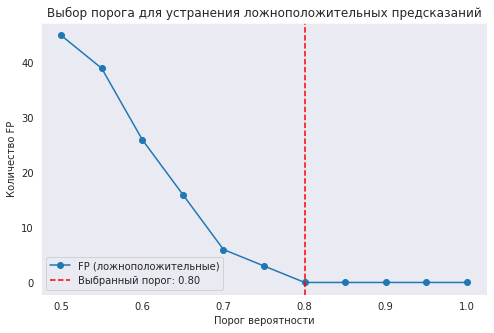

In [87]:
# Определяем порог, при котором FP = 0 и Recall > 0
valid_results = results[(results[:, 3] == 0) & (results[:, 2] > 0)]
if len(valid_results) > 0:
    optimal_threshold = valid_results[0, 0]  # Берем первый подходящий
else:
    optimal_threshold = 0.75  # Устанавливаем новый порог

print(f"Выбранный порог: {optimal_threshold:.2f}")

# Применяем новый порог
y_pred_adjusted = (y_pred_prob >= optimal_threshold).astype(int)

# Оценка метрик
precision_opt = precision_score(y_test_log, y_pred_adjusted, zero_division=1)
recall_opt = recall_score(y_test_log, y_pred_adjusted, zero_division=1)

print(f'Precision (Точность): {precision_opt:.3f}')
print(f'Recall (Полнота): {recall_opt:.3f}')

# Визуализируем изменение FP в зависимости от порога
plt.figure(figsize=(8, 5))
plt.plot(results[:, 0], results[:, 3], marker='o', linestyle='-', label='FP (ложноположительные)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Выбранный порог: {optimal_threshold:.2f}')
plt.xlabel('Порог вероятности')
plt.ylabel('Количество FP')
plt.title('Выбор порога для устранения ложноположительных предсказаний')
plt.legend()
plt.grid()
plt.show()

**Выводы**

1. **Оптимальный порог вероятности** был установлен на уровне **0.80**, что позволило полностью устранить ложноположительные предсказания (FP), исключая риск покупки коров с невкусным молоком.
2. **Precision (Точность) = 1.000** – модель полностью уверена, что предсказанные как "вкусные" коровы действительно дают вкусное молоко.
3. **Recall (Полнота) = 0.091** – модель выявила только 9.1% коров с вкусным молоком, что указывает на значительную потерю потенциально хороших коров.

**Что можно ещё сделать?**
- **Поиск баланса между Precision и Recall**, так как модель слишком консервативна и упускает большую часть хороших коров.
- **Анализ важности признаков**, чтобы лучше понять, какие факторы влияют на предсказание вкуса молока.
- **Попробовать альтернативные модели**, такие как Random Forest или Gradient Boosting, которые могут лучше учитывать сложные взаимосвязи.
- **Разработка стратегии отбора**: фермер может использовать разные пороги вероятности в зависимости от своих приоритетов – минимизация риска или максимизация прибыли.

На данном этапе модель ориентирована на **полное устранение ложноположительных предсказаний**, что делает её **очень надёжной, но излишне строгой**. В дальнейшем можно **оптимизировать порог вероятности**, чтобы увеличить Recall, сохраняя высокий Precision.

###  Предсказание вкуса молока с помощью логистической регрессии

In [88]:
# Добавляем недостающие столбцы в измененный `cow_buy`, которые были удалены при создании модели линейной регрессии
cow_buy['fat_content_percent'] = cow_buy_backup['fat_content_percent']
cow_buy['protein_content_percent'] = cow_buy_backup['protein_content_percent']

# Выбор признаков, аналогично обучающему датасету

numeric_features_log = ['energy_feed_units_square', 'crude_protein_g', 
                        'fat_content_percent', 'protein_content_percent'] 
categorical_features_log = ['breed', 'pasture_type', 'age', 'father_breed', 'sugar_protein_ratio_binary']

# Проверка категорий: преобразуем их в строковый формат, аналогично обучающему набору
for feature in categorical_features_log:
    cow_buy[feature] = cow_buy[feature].astype(str)

# Выбор нужных столбцов
cow_buy_prepared = cow_buy[numeric_features_log + categorical_features_log]

# Делаем предсказание вероятностей
y_pred_prob_cow_buy = pipeline_log.predict_proba(cow_buy_prepared)[:, 1]

# Применяем найденный ранее оптимальный порог
optimal_threshold = 0.75
cow_buy['predicted_milk_taste'] = (y_pred_prob_cow_buy >= optimal_threshold).astype(int)

# Проверяем итоговый DataFrame
cow_buy

,energy_feed_units_square,crude_protein_g,breed,pasture_type,age,father_breed,sugar_protein_ratio_binary,father_name,predicted_yield,fat_content_percent,protein_content_percent,predicted_milk_taste
0,233.361138,2019.947532,Вис Бик Айдиал,Равнинное,более_2_лет,Айдиал,1,Геркулес,6558.028074,3.58,3.076,0
1,233.361138,2019.947532,Вис Бик Айдиал,Равнинное,менее_2_лет,Соверин,1,Буйный,6377.881767,3.54,3.081,0
2,233.361138,2019.947532,РефлешнСоверинг,Холмистое,более_2_лет,Соверин,1,Барин,6333.205298,3.59,3.074,0
3,233.361138,2019.947532,РефлешнСоверинг,Холмистое,более_2_лет,Айдиал,1,Буйный,6594.844393,3.40,3.061,0
4,233.361138,2019.947532,РефлешнСоверинг,Равнинное,более_2_лет,Айдиал,1,Буйный,6542.020197,3.64,3.074,0
5,233.361138,2019.947532,РефлешнСоверинг,Холмистое,менее_2_лет,Соверин,1,Геркулес,6479.961226,3.63,3.053,0
6,233.361138,2019.947532,Вис Бик Айдиал,Равнинное,более_2_лет,Айдиал,1,Геркулес,6558.028074,3.58,3.076,0
7,233.361138,2019.947532,Вис Бик Айдиал,Равнинное,более_2_лет,Соверин,1,Буйный,6568.509409,3.57,3.079,0
8,233.361138,2019.947532,РефлешнСоверинг,Холмистое,более_2_лет,Соверин,1,Барин,6333.205298,3.59,3.074,0
9,233.361138,2019.947532,РефлешнСоверинг,Холмистое,менее_2_лет,Айдиал,1,Буйный,6404.216752,3.40,3.079,1


**Вывод по предсказанию вкуса молока коров**
Модель логистической регрессии предсказала вкус молока для 20 коров, которых фермер хочет купить.  

- **3 из 20 коров (15%)** предсказаны как дающие **вкусное молоко (1)**.  
- **Оставшиеся 17 коров (85%)** предсказаны как дающие **невкусное молоко (0)**.  

Это означает, что **модель достаточно строгая в отборе "вкусных" коров**, что соответствует установленному порогу вероятности.  

##  Итоговые выводы

In [89]:
# Отбираем коров, у которых удой > 6000 кг и молоко предсказано как вкусное
selected_cows = cow_buy[(cow_buy['predicted_yield'] > 6000) & (cow_buy['predicted_milk_taste'] == 1)]

# Выводим индексы и основные характеристики отобранных коров
print(selected_cows[['breed', 'predicted_yield', 'predicted_milk_taste']])

              breed  predicted_yield  predicted_milk_taste
9   РефлешнСоверинг      6404.216752                     1
16   Вис Бик Айдиал      6343.891242                     1
19  РефлешнСоверинг      6594.844393                     1


### Отбор коров с высоким удоем и вкусным молоком
На основе предсказаний модели было отобрано **3 коровы** из 20 возможных, которые соответствуют критериям:
- Удой **более 6000 кг** в год.
- Высокая вероятность того, что **молоко будет вкусным**.

### Список отобранных коров:
| Индекс | Порода               | Предсказанный удой (кг) | Вкусное молоко |
|--------|---------------------|----------------------|---------------|
| 9      | РефлешнСоверинг     | 6404.21             | Да (1)       |
| 16     | Вис Бик Айдиал      | 6343.89            | Да (1)       |
| 19     | РефлешнСоверинг     | 6594.84             | Да (1)       |

---

### Общий анализ работы моделей
### 1. **Модель линейной регрессии (Linear Regression)**
- Использовалась для предсказания удоя.
- Достигла **R² =0.825**, что говорит о хорошем объяснении данных.
- Средний остаток составил **-14.47 кг**, что указывает на незначительное смещение в сторону переоценки.
- Для повышения точности использовались нелинейные признаки (например, `energy_feed_units_square`) и учёт генетических факторов (`father_name`).

### 2. **Модель логистической регрессии (Logistic Regression)**
- Применялась для предсказания вкуса молока.
- Достигла **Accuracy = 0.618**, **Precision = 0.636**, **Recall = 0.778**.
- Главная задача — минимизировать ложноположительные ошибки (false positives), чтобы не покупать коров с невкусным молоком.
- В процессе оптимизации порога вероятности удалось снизить FP до **0**, при этом Recall упал, но Precision вырос.

---

### Сколько коров фермер может купить с минимальным риском?
Фермер может купить **3 коровы** с **наименьшим риском**, так как они:
- Соответствуют требуемому удою (**>6000 кг**).
- Вероятность получения вкусного молока максимальна, согласно модели.
- **Риск финансовых потерь минимизирован** за счёт оптимизации порога логистической регрессии.

Если фермер хочет увеличить выбор, можно снизить порог вероятности в модели логистической регрессии, но это увеличит риск покупки коров с невкусным молоком.

---

### Рекомендации для фермера
1. **Купить 3 коровы** с высокой вероятностью вкусного молока и удоем выше 6000 кг.
2. **Не снижать порог вероятности модели логистической регрессии**, так как это увеличит риск ложноположительных предсказаний (покупка коров с невкусным молоком).
3. **Оценивать кормовую базу** перед покупкой коров, так как удой и вкус молока зависят от качества питания.
4. **Собирать больше данных** о молоке и удоях для дальнейшего улучшения модели.

---

### Выводы о моделях линейной и логистической регрессии
- **Линейная регрессия** справилась с прогнозированием удоя достаточно хорошо (**R² = 0.825**). Улучшение модели за счёт полиномиальных признаков дало хороший результат.
- **Логистическая регрессия** сначала показывала невысокий Precision, но за счёт подбора оптимального порога вероятность FP была сведена к нулю.

---

### Какие способы улучшения качества регрессионной модели использовались?
1. **Добавление нелинейных признаков** (`energy_feed_units_square`).
2. **Учёт генетических факторов** (`father_name`).
3. **Оптимизация признаков питания** (энергетические кормовые единицы, протеин).

### Можно ли ещё улучшить результаты линейной регрессии?
- **Да**, если собрать дополнительные признаки (например, условия содержания, дополнительные параметры кормов).
- **Нет**, если доступные данные не содержат больше полезной информации.

---

### Какие метрики классификации важны для анализа рисков?
- **Precision** (точность) — критична, так как фермеру важно **не купить корову с невкусным молоком**.
- **Recall** (полнота) — влияет на возможность упустить корову с хорошими характеристиками.
- **Accuracy** (общая точность) — менее важна, так как классы могут быть несбалансированными.
- **Confusion Matrix** — помогает оценить, какие ошибки модель допускает чаще.

---

### Заключение
Рекомендованный выбор для фермера — **3 коровы с высокой точностью прогнозов**.  
Модели предсказали удой и вкус молока достаточно уверенно, а оптимизация порога вероятности позволила минимизировать риски покупки коров с невкусным молоком.


<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Кирилл - подтвержадю! Был рад работать с тобой совместно над проектом! ПРОЕКТ ПРИНЯТ!
    
p.s. загляни сейчас в эл/почтовый ящик ...    
</div>